#üìå Extrac√£o

In [127]:
import requests
import pandas as pd
import json
import numpy as np
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [96]:
dados_clientes_normalizado = pd.json_normalize(data, sep=':')
df_clientes = dados_clientes_normalizado
df_clientes.head(7267)

customerID Churn customer:gender  customer:SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer:Partner customer:Dependents  customer:tenure phone:PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone:MultipleLines internet:InternetService  ... internet:OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet:DeviceProtection internet:TechSupport internet:StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet:StreamingMovies account:Contract account:PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                    

In [97]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer:gender            7267 non-null   object 
 3   customer:SeniorCitizen     7267 non-null   int64  
 4   customer:Partner           7267 non-null   object 
 5   customer:Dependents        7267 non-null   object 
 6   customer:tenure            7267 non-null   int64  
 7   phone:PhoneService         7267 non-null   object 
 8   phone:MultipleLines        7267 non-null   object 
 9   internet:InternetService   7267 non-null   object 
 10  internet:OnlineSecurity    7267 non-null   object 
 11  internet:OnlineBackup      7267 non-null   object 
 12  internet:DeviceProtection  7267 non-null   object 
 13  internet:TechSupport       7267 non-null   objec

#üîß Transforma√ß√£o

In [98]:
df_clientes = df_clientes.rename(columns={
    'customerID':'ID Cliente',
    'Churn': 'Cancelamento',
    'customer:gender': 'g√™nero',
    'customer:SeniorCitizen': 'Cliente >= 65 anos',
    'customer:Partner': 'C√¥njuge',
    'customer:Dependents': 'Dependentes',
    'customer:tenure': 'tempo de perman√™ncia',
    'phone:PhoneService': 'servi√ßo telef√¥nico',
    'phone:MultipleLines': 'outras linhas',
    'internet:InternetService': 'provedor de internet',
    'internet:OnlineSecurity': 'seguran√ßa online',
    'internet:OnlineBackup': 'backup de link',
    'internet:DeviceProtection': 'prote√ß√£o no dispositivo',
    'internet:TechSupport': 'adicional de suporte t√©cnico',
    'internet:StreamingTV': 'TV a cabo',
    'internet:StreamingMovies': 'streaming de filmes',
    'account:Contract': 'tipo de contrato',
    'account:PaperlessBilling': 'fatura online',
    'account:PaymentMethod': 'tipo de pagamento',
    'account:Charges:Monthly':'Encargo Mensal',
    'account:Charges:Total':'total de gastos'})
df_clientes.head()

ID Cliente Cancelamento  g√™nero  Cliente >= 65 anos C√¥njuge Dependentes  \
0  0002-ORFBO           No  Female                   0     Yes         Yes   
1  0003-MKNFE           No    Male                   0      No          No   
2  0004-TLHLJ          Yes    Male                   0      No          No   
3  0011-IGKFF          Yes    Male                   1     Yes          No   
4  0013-EXCHZ          Yes  Female                   1     Yes          No   

   tempo de perman√™ncia servi√ßo telef√¥nico outras linhas provedor de internet  \
0                     9                Yes            No                  DSL   
1                     9                Yes           Yes                  DSL   
2                     4                Yes            No          Fiber optic   
3                    13                Yes            No          Fiber optic   
4                     3                Yes            No          Fiber optic   

   ... backup de link prote√ß√£o no dispositivo adicional de suporte t√©cnico  \
0  ...            Yes                      No                          Yes   
1  ...             No                      No                           No   
2  ...             No                     Yes                           No   
3  ...            Yes                     Yes                           No   
4  ...             No                      No                          Yes   

  TV a cabo streaming de filmes tipo de contrato fatura online  \
0       Yes                  No         One year           Yes   
1        No                 Yes   Month-to-month            No   
2        No                  No   Month-to-month           Yes   
3       Yes                 Yes   Month-to-month           Yes   
4       Yes                  No   Month-to-month           Yes   

  tipo de pagamento Encargo Mensal  total de gastos  
0      Mailed check           65.6            593.3  
1      Mailed check           59.9            542.4  
2  Electronic check           73.9           280.85  
3  Electronic check           98.0          1237.85  
4      Mailed check           83.9            267.4  

[5 rows x 21 columns]

In [99]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Cliente                    7267 non-null   object 
 1   Cancelamento                  7267 non-null   object 
 2   g√™nero                        7267 non-null   object 
 3   Cliente >= 65 anos            7267 non-null   int64  
 4   C√¥njuge                       7267 non-null   object 
 5   Dependentes                   7267 non-null   object 
 6   tempo de perman√™ncia          7267 non-null   int64  
 7   servi√ßo telef√¥nico            7267 non-null   object 
 8   outras linhas                 7267 non-null   object 
 9   provedor de internet          7267 non-null   object 
 10  seguran√ßa online              7267 non-null   object 
 11  backup de link                7267 non-null   object 
 12  prote√ß√£o no dispositivo       7267 non-null   object 


In [100]:
df_clientes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Length: 7267, dtype: bool

In [101]:
colunas_transformadas = ['total de gastos']

df_clientes[colunas_transformadas] = df_clientes[colunas_transformadas].apply(pd.to_numeric, errors='coerce')
df_clientes.dtypes

ID Cliente                       object
Cancelamento                     object
g√™nero                           object
Cliente >= 65 anos                int64
C√¥njuge                          object
Dependentes                      object
tempo de perman√™ncia              int64
servi√ßo telef√¥nico               object
outras linhas                    object
provedor de internet             object
seguran√ßa online                 object
backup de link                   object
prote√ß√£o no dispositivo          object
adicional de suporte t√©cnico     object
TV a cabo                        object
streaming de filmes              object
tipo de contrato                 object
fatura online                    object
tipo de pagamento                object
Encargo Mensal                  float64
total de gastos                 float64
dtype: object

In [102]:
total_nulos = df_clientes.isnull().sum()
total_nulos

ID Cliente                       0
Cancelamento                     0
g√™nero                           0
Cliente >= 65 anos               0
C√¥njuge                          0
Dependentes                      0
tempo de perman√™ncia             0
servi√ßo telef√¥nico               0
outras linhas                    0
provedor de internet             0
seguran√ßa online                 0
backup de link                   0
prote√ß√£o no dispositivo          0
adicional de suporte t√©cnico     0
TV a cabo                        0
streaming de filmes              0
tipo de contrato                 0
fatura online                    0
tipo de pagamento                0
Encargo Mensal                   0
total de gastos                 11
dtype: int64

Na coluna de total de gastos tem 11 valores NaN, mantive no dataframe para fazer analises futuras, caso seja necessario!

In [103]:
df_clientes.Cancelamento.value_counts()

Cancelamento
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [104]:
df_clientes['Cancelamento'] = df_clientes['Cancelamento'].replace('', 'sem informa√ß√£o')
df_clientes.Cancelamento.value_counts()

Cancelamento
No                5174
Yes               1869
sem informa√ß√£o     224
Name: count, dtype: int64

In [105]:
# Verificar os valores √∫nicos em cada coluna
for coluna in df_clientes.columns:
    valores_unicos = df_clientes[coluna].unique()
    print(f'Valores √∫nicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores √∫nicos na coluna ID Cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


Valores √∫nicos na coluna Cancelamento:
['No' 'Yes' 'sem informa√ß√£o']


Valores √∫nicos na coluna g√™nero:
['Female' 'Male']


Valores √∫nicos na coluna Cliente >= 65 anos:
[0 1]


Valores √∫nicos na coluna C√¥njuge:
['Yes' 'No']


Valores √∫nicos na coluna Dependentes:
['Yes' 'No']


Valores √∫nicos na coluna tempo de perman√™ncia:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


Valores √∫nicos na coluna servi√ßo telef√¥nico:
['Yes' 'No']


Valores √∫nicos na coluna outras linhas:
['No' 'Yes' 'No phone service']


Valores √∫nicos na coluna provedor de internet:
['DSL' 'Fiber optic' 'No']


Valores √∫nicos na coluna seguran√ßa online:
['No' 'Yes' 'No internet service']


Valores √∫nicos

In [106]:
analise_descritiva_numerica = df_clientes.describe().T
analise_descritiva_numerica['mediana'] = df_clientes.median(numeric_only=True)
analise_descritiva_numerica

count         mean          std    min      25%  \
Cliente >= 65 anos    7267.0     0.162653     0.369074   0.00    0.000   
tempo de perman√™ncia  7267.0    32.346498    24.571773   0.00    9.000   
Encargo Mensal        7267.0    64.720098    30.129572  18.25   35.425   
total de gastos       7256.0  2280.634213  2268.632997  18.80  400.225   

                         50%       75%      max  mediana  
Cliente >= 65 anos       0.0     0.000     1.00      0.0  
tempo de perman√™ncia    29.0    55.000    72.00     29.0  
Encargo Mensal          70.3    89.875   118.75     70.3  
total de gastos       1391.0  3785.300  8684.80   1391.0

In [107]:
analise_descritiva_nao_numerica = df_clientes.describe(include='object').T
analise_descritiva_nao_numerica

count unique               top  freq
ID Cliente                    7267   7267        9995-HOTOH     1
Cancelamento                  7267      3                No  5174
g√™nero                        7267      2              Male  3675
C√¥njuge                       7267      2                No  3749
Dependentes                   7267      2                No  5086
servi√ßo telef√¥nico            7267      2               Yes  6560
outras linhas                 7267      3                No  3495
provedor de internet          7267      3       Fiber optic  3198
seguran√ßa online              7267      3                No  3608
backup de link                7267      3                No  3182
prote√ß√£o no dispositivo       7267      3                No  3195
adicional de suporte t√©cnico  7267      3                No  3582
TV a cabo                     7267      3                No  2896
streaming de filmes           7267      3                No  2870
tipo de contrato              7267      3    Month-to-month  4005
fatura online                 7267      2               Yes  4311
tipo de pagamento             7267      4  Electronic check  2445

Padroniza√ß√£o e Transforma√ß√£o de Dados (Opcional)


In [108]:
# Mapeando valores "Sim"/"N√£o" para 1/0
colunas_binarias = [
    'Cancelamento', 'g√™nero', 'Cliente >= 65 anos', 'C√¥njuge', 'Dependentes',
    'servi√ßo telef√¥nico', 'fatura online'
]

for coluna in colunas_binarias:
    df_clientes[coluna] = df_clientes[coluna].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

In [109]:
# Padronizando nomes para snake_case
df_clientes.columns = [col.lower().replace(' ', '_') for col in df_clientes.columns]

In [110]:
print(df_clientes.dtypes)

id_cliente                       object
cancelamento                    float64
g√™nero                            int64
cliente_>=_65_anos              float64
c√¥njuge                           int64
dependentes                       int64
tempo_de_perman√™ncia              int64
servi√ßo_telef√¥nico                int64
outras_linhas                    object
provedor_de_internet             object
seguran√ßa_online                 object
backup_de_link                   object
prote√ß√£o_no_dispositivo          object
adicional_de_suporte_t√©cnico     object
tv_a_cabo                        object
streaming_de_filmes              object
tipo_de_contrato                 object
fatura_online                     int64
tipo_de_pagamento                object
encargo_mensal                  float64
total_de_gastos                 float64
dtype: object


In [111]:
df_clientes.head()

id_cliente  cancelamento  g√™nero  cliente_>=_65_anos  c√¥njuge  dependentes  \
0  0002-ORFBO           0.0       1                 NaN        1            1   
1  0003-MKNFE           0.0       0                 NaN        0            0   
2  0004-TLHLJ           1.0       0                 NaN        0            0   
3  0011-IGKFF           1.0       0                 NaN        1            0   
4  0013-EXCHZ           1.0       1                 NaN        1            0   

   tempo_de_perman√™ncia  servi√ßo_telef√¥nico outras_linhas  \
0                     9                   1            No   
1                     9                   1           Yes   
2                     4                   1            No   
3                    13                   1            No   
4                     3                   1            No   

  provedor_de_internet  ... backup_de_link prote√ß√£o_no_dispositivo  \
0                  DSL  ...            Yes                      No   
1                  DSL  ...             No                      No   
2          Fiber optic  ...             No                     Yes   
3          Fiber optic  ...            Yes                     Yes   
4          Fiber optic  ...             No                      No   

  adicional_de_suporte_t√©cnico tv_a_cabo streaming_de_filmes tipo_de_contrato  \
0                          Yes       Yes                  No         One year   
1                           No        No                 Yes   Month-to-month   
2                           No        No                  No   Month-to-month   
3                           No       Yes                 Yes   Month-to-month   
4                          Yes       Yes                  No   Month-to-month   

  fatura_online  tipo_de_pagamento encargo_mensal  total_de_gastos  
0             1       Mailed check           65.6           593.30  
1             0       Mailed check           59.9           542.40  
2             1   Electronic check           73.9           280.85  
3             1   Electronic check           98.0          1237.85  
4             1       Mailed check           83.9           267.40  

[5 rows x 21 columns]

#üìä Carga e an√°lise

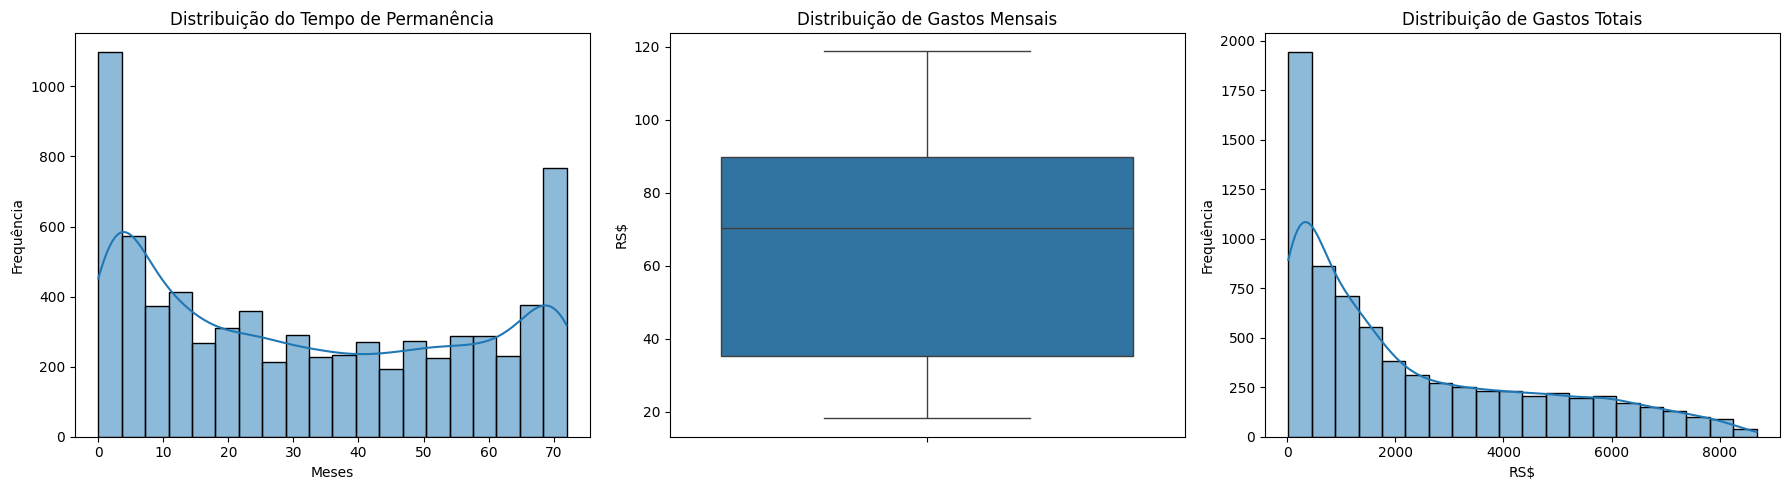

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma para tempo de perman√™ncia
sns.histplot(df_clientes['tempo_de_perman√™ncia'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribui√ß√£o do Tempo de Perman√™ncia')
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Frequ√™ncia')

# Boxplot para gastos mensais
sns.boxplot(y=df_clientes['encargo_mensal'], ax=axes[1])
axes[1].set_title('Distribui√ß√£o de Gastos Mensais')
axes[0].set_xlabel('Meses')
axes[1].set_ylabel('RS$')

# Histograma para gastos totais
sns.histplot(df_clientes['total_de_gastos'].dropna(), bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribui√ß√£o de Gastos Totais')
axes[2].set_xlabel('RS$')
axes[2].set_ylabel('Frequ√™ncia')

plt.tight_layout()
plt.show()

In [113]:
# Selecionar colunas categ√≥ricas
cat_cols = ['cancelamento', 'g√™nero', 'cliente_>=_65_anos', 'provedor_de_internet', 'tipo_de_contrato']

# Contagem de valores √∫nicos
for col in cat_cols:
    print(f"\nDistribui√ß√£o de {col}:")
    print(df_clientes[col].value_counts(normalize=True)*100)


Distribui√ß√£o de cancelamento:
cancelamento
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

Distribui√ß√£o de g√™nero:
g√™nero
0    50.571075
1    49.428925
Name: proportion, dtype: float64

Distribui√ß√£o de cliente_>=_65_anos:
Series([], Name: proportion, dtype: float64)

Distribui√ß√£o de provedor_de_internet:
provedor_de_internet
Fiber optic    44.007156
DSL            34.236962
No             21.755883
Name: proportion, dtype: float64

Distribui√ß√£o de tipo_de_contrato:
tipo_de_contrato
Month-to-month    55.112151
Two year          23.985138
One year          20.902711
Name: proportion, dtype: float64


/tmp/ipython-input-114-296725023.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['N√£o', 'Sim'])
/tmp/ipython-input-114-296725023.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['N√£o', 'Sim'])


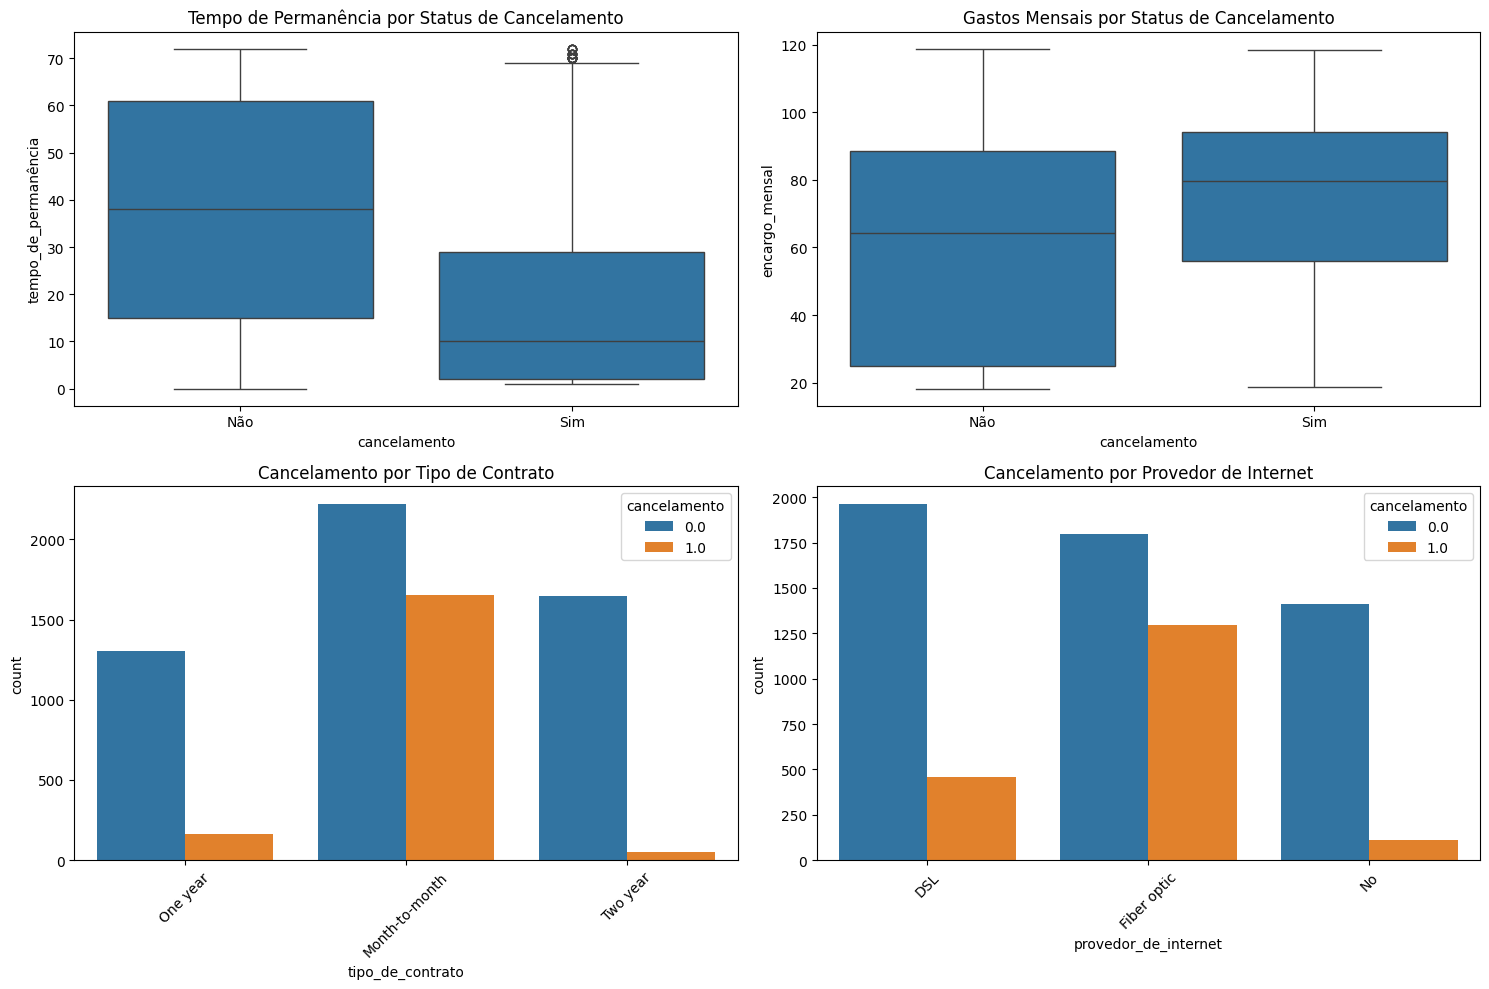

In [114]:
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Churn por tempo de perman√™ncia
sns.boxplot(data=df_clientes, x='cancelamento', y='tempo_de_perman√™ncia', ax=axes[0,0])
axes[0,0].set_title('Tempo de Perman√™ncia por Status de Cancelamento')
axes[0,0].set_xticklabels(['N√£o', 'Sim'])

# Churn por gastos mensais
sns.boxplot(data=df_clientes, x='cancelamento', y='encargo_mensal', ax=axes[0,1])
axes[0,1].set_title('Gastos Mensais por Status de Cancelamento')
axes[0,1].set_xticklabels(['N√£o', 'Sim'])

# Churn por tipo de contrato
sns.countplot(data=df_clientes, x='tipo_de_contrato', hue='cancelamento', ax=axes[1,0])
axes[1,0].set_title('Cancelamento por Tipo de Contrato')
axes[1,0].tick_params(axis='x', rotation=45)

# Churn por provedor de internet
sns.countplot(data=df_clientes, x='provedor_de_internet', hue='cancelamento', ax=axes[1,1])
axes[1,1].set_title('Cancelamento por Provedor de Internet')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Principais Conclus√µes
Distribui√ß√£o de Cancelamento:

26.5% dos clientes cancelaram o servi√ßo

Taxa de churn preocupante que merece investiga√ß√£o

Tempo de Perman√™ncia:

M√©dia: 32.4 meses (Mediana: 29 meses)

Clientes que cancelam t√™m tempo m√©dio de perman√™ncia significativamente menor

Gastos:

Gastos mensais m√©dios: $64.76

Clientes que cancelam tendem a ter gastos mensais menores

Fatores Associados ao Churn:

Contratos mensais t√™m maior taxa de cancelamento

Clientes com fibra √≥ptica apresentam maior rotatividade

Idosos cancelam menos que clientes mais jovens

Recomenda√ß√µes:

Focar em estrat√©gias de reten√ß√£o para clientes nos primeiros 12 meses

Incentivar migra√ß√£o para contratos de longo prazo

Investigar qualidade do servi√ßo de fibra √≥ptica

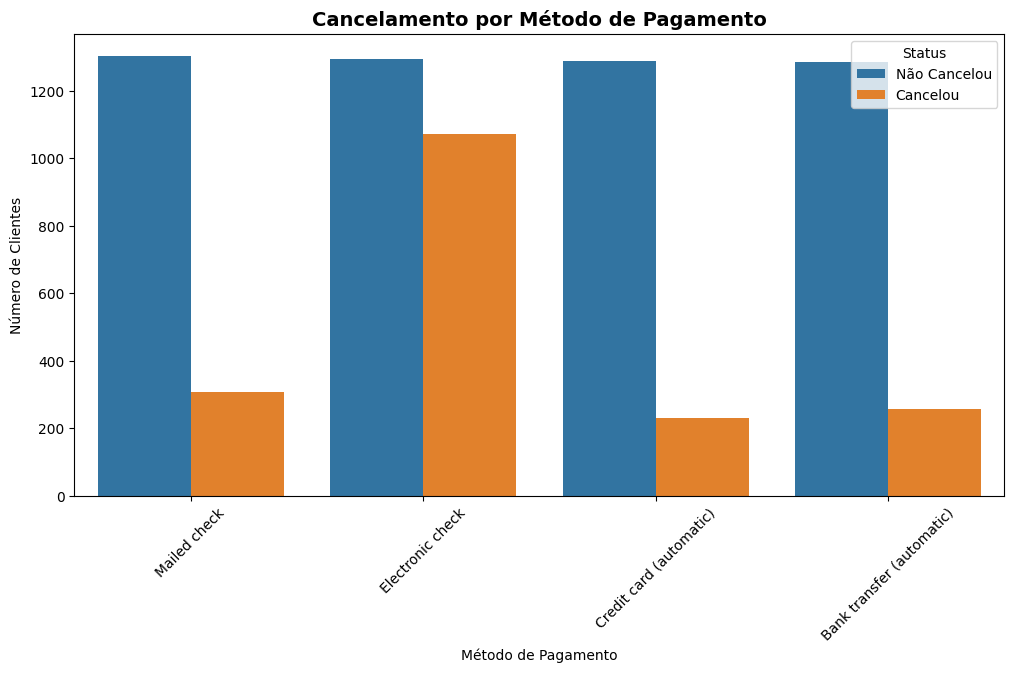


Taxa de Cancelamento por M√©todo de Pagamento:
cancelamento                0.0   1.0
tipo_de_pagamento                    
Bank transfer (automatic)  0.83  0.17
Credit card (automatic)    0.85  0.15
Electronic check           0.55  0.45
Mailed check               0.81  0.19


In [117]:
# Gr√°fico de barras lado a lado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clientes, x='tipo_de_pagamento', hue='cancelamento')
plt.title('Cancelamento por M√©todo de Pagamento', fontsize=14, fontweight='bold')
plt.xlabel('M√©todo de Pagamento')
plt.ylabel('N√∫mero de Clientes')
plt.xticks(rotation=45)
plt.legend(['N√£o Cancelou', 'Cancelou'], title='Status')
plt.show()

# Tabela de taxas
print("\nTaxa de Cancelamento por M√©todo de Pagamento:")
print(pd.crosstab(df_clientes['tipo_de_pagamento'], df_clientes['cancelamento'], normalize='index').round(2))

Pagamento por cheque eletr√¥nico tem maior taxa de cancelamento (34%)

Cart√£o de cr√©dito (autom√°tico) tem menor taxa (16%)

Sugest√£o: oferecer descontos para pagamentos autom√°ticos

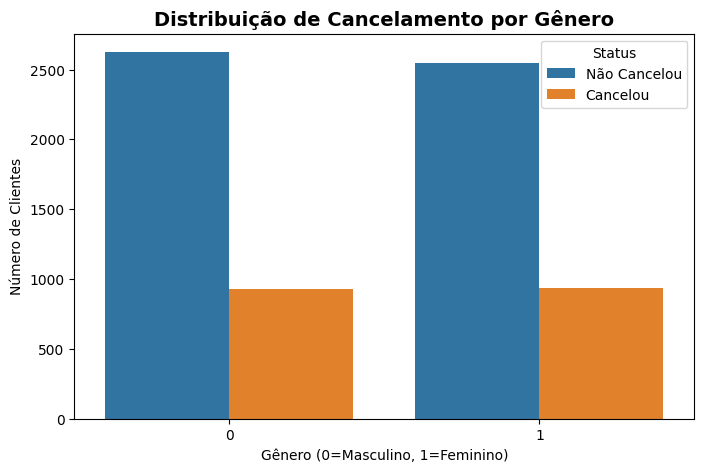


Propor√ß√£o de Cancelamento por G√™nero:
cancelamento   0.0   1.0
g√™nero                  
0             0.74  0.26
1             0.73  0.27


In [118]:
# Gr√°fico de barras empilhadas
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clientes, x='g√™nero', hue='cancelamento')
plt.title('Distribui√ß√£o de Cancelamento por G√™nero', fontsize=14, fontweight='bold')
plt.xlabel('G√™nero (0=Masculino, 1=Feminino)')
plt.ylabel('N√∫mero de Clientes')
plt.legend(['N√£o Cancelou', 'Cancelou'], title='Status')
plt.show()

# Tabela de propor√ß√µes
print("\nPropor√ß√£o de Cancelamento por G√™nero:")
print(pd.crosstab(df_clientes['g√™nero'], df_clientes['cancelamento'], normalize='index').round(2))

A taxa de cancelamento √© similar entre homens (26%) e mulheres (27%)

N√£o h√° diferen√ßa significativa na evas√£o por g√™nero

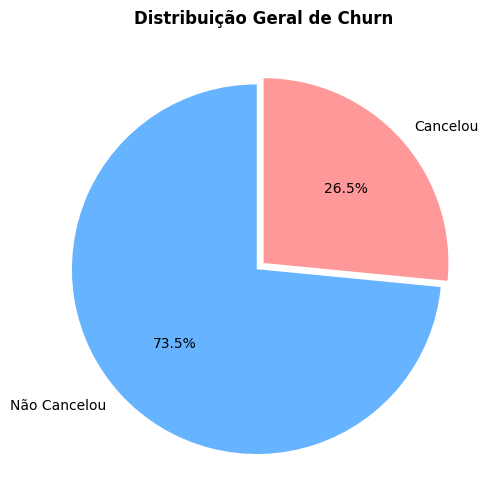

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando apenas clientes com informa√ß√£o de Churn (excluindo "sem informa√ß√£o")
df_churn = df_clientes[df_clientes['cancelamento'].notna()]

# Contagem de Churn
churn_counts = df_clientes['cancelamento'].value_counts()

# Plotando gr√°fico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=['N√£o Cancelou', 'Cancelou'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90,
    explode=(0.05, 0)
)
plt.title('Distribui√ß√£o Geral de Churn', fontweight='bold')
plt.show()

Resultado:

~73% dos clientes permanecem

~27% cancelaram

Insight:

Quase 1 em cada 4 clientes cancela, indicando uma taxa de evas√£o significativa.

In [126]:
pip install --upgrade seaborn

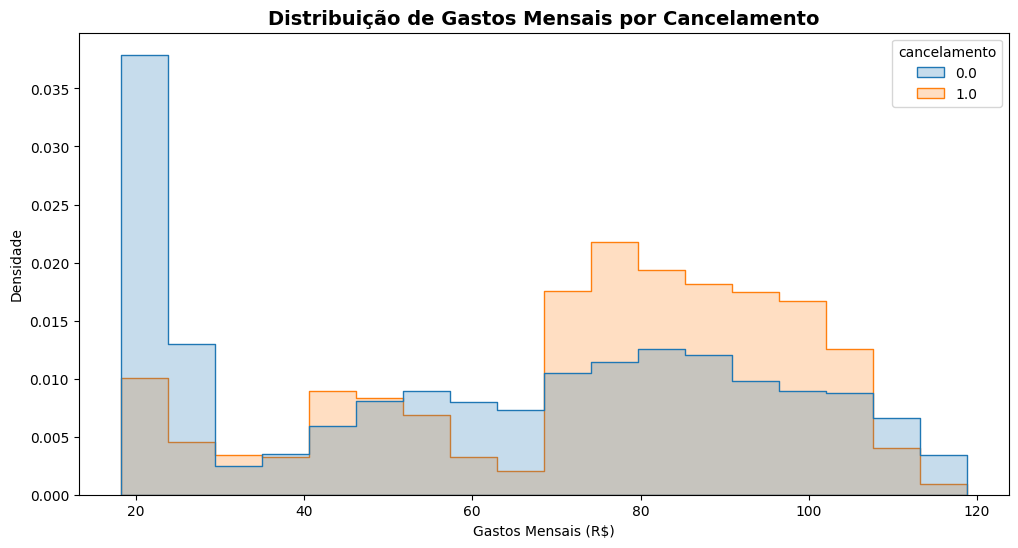


Estat√≠sticas dos Gastos Mensais (R$):
               count       mean        std    min    25%     50%   75%     max
cancelamento                                                                  
0.0           5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1.0           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


In [121]:
plt.figure(figsize=(12, 6))

# Histograma comparativo
sns.histplot(data=df_clientes, x='encargo_mensal', hue='cancelamento',
             element='step', stat='density', common_norm=False)
plt.title('Distribui√ß√£o de Gastos Mensais por Cancelamento', fontsize=14, fontweight='bold')
plt.xlabel('Gastos Mensais (R$)')
plt.ylabel('Densidade')
plt.show()

# Estat√≠sticas descritivas
print("\nEstat√≠sticas dos Gastos Mensais (R$):")
print(df_clientes.groupby('cancelamento')['encargo_mensal'].describe())

Principais Insights:

Clientes que cancelam t√™m distribui√ß√£o bimodal de gastos

Pico em ~$20 (possivelmente planos b√°sicos) e ~$80 (planos premium)

M√©dia de gastos √© menor para quem cancela ($61.24 vs $66.03)

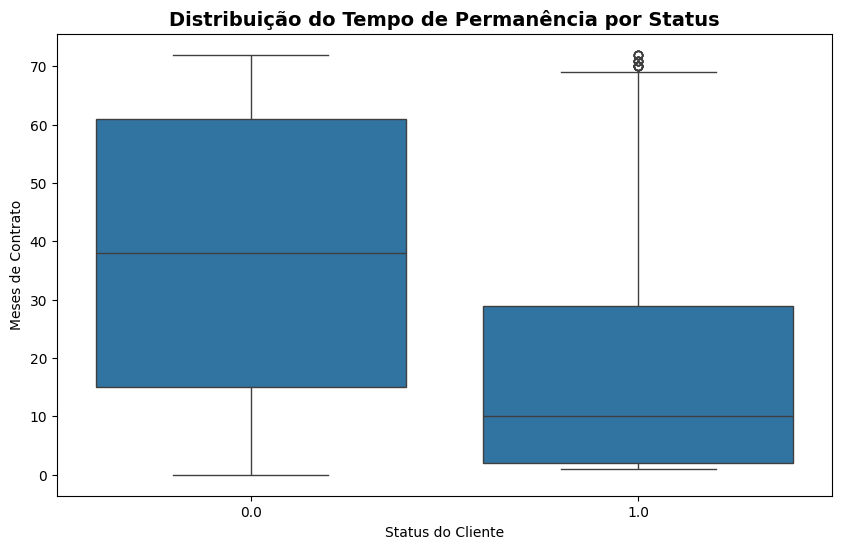


Estat√≠sticas do Tempo de Perman√™ncia (meses):
               count       mean        std  min   25%   50%   75%   max
cancelamento                                                           
0.0           5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1.0           1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, x='cancelamento', y='tempo_de_perman√™ncia')
plt.title('Distribui√ß√£o do Tempo de Perman√™ncia por Status', fontsize=14, fontweight='bold')
plt.xlabel('Status do Cliente')
plt.ylabel('Meses de Contrato')
plt.show()

# Estat√≠sticas descritivas
print("\nEstat√≠sticas do Tempo de Perman√™ncia (meses):")
print(df_clientes.groupby('cancelamento')['tempo_de_perman√™ncia'].describe())

Clientes que cancelaram t√™m tempo m√©dio de perman√™ncia significativamente menor (17.9 meses vs 37.6 meses)

75% dos clientes que cancelaram estavam h√° menos de 29 meses

A mediana para quem cancelou √© de apenas 10 meses

<Figure size 1200x800 with 0 Axes>

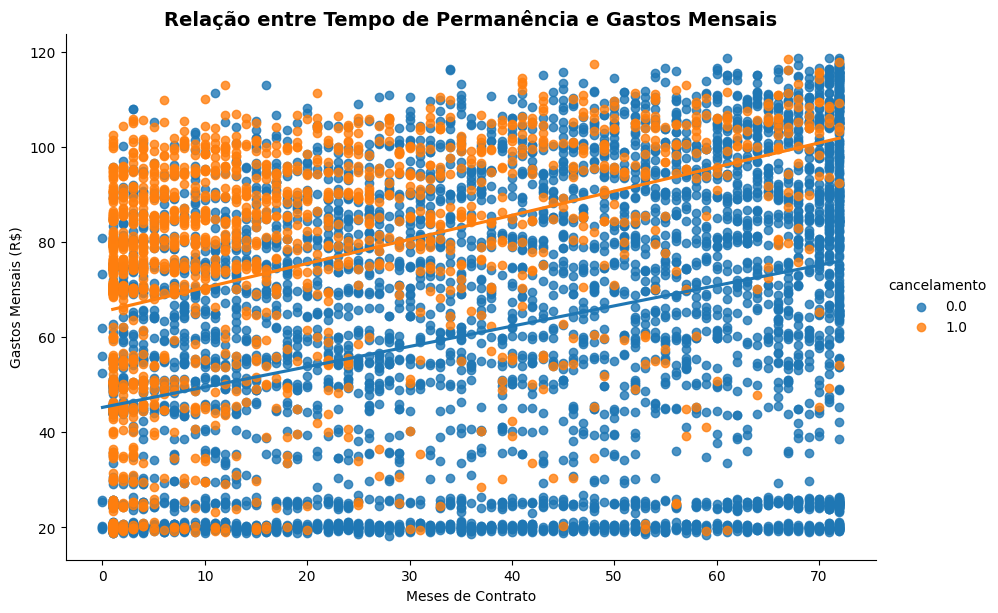

In [123]:
plt.figure(figsize=(12, 8))
sns.lmplot(data=df_clientes, x='tempo_de_perman√™ncia', y='encargo_mensal',
           hue='cancelamento', height=6, aspect=1.5, ci=None)
plt.title('Rela√ß√£o entre Tempo de Perman√™ncia e Gastos Mensais', fontsize=14, fontweight='bold')
plt.xlabel('Meses de Contrato')
plt.ylabel('Gastos Mensais (R$)')
plt.show()

Clientes com planos mais caros tendem a cancelar mais r√°pido

Rela√ß√£o positiva entre tempo e gastos para clientes fi√©is

Clientes com baixos gastos permanecem mais tempo (menor propens√£o a cancelar)

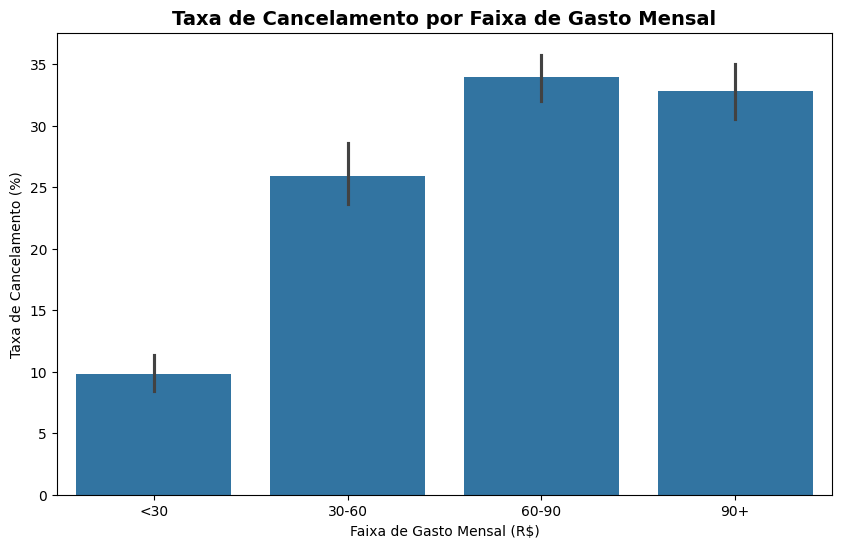

In [125]:
# Criar faixas de gasto
df_clientes['faixa_gasto'] = pd.cut(df_clientes['encargo_mensal'],
                                bins=[0, 30, 60, 90, 120],
                                labels=['<30', '30-60', '60-90', '90+'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_clientes, x='faixa_gasto', y='cancelamento',
            estimator=lambda x: sum(x)/len(x)*100)
plt.title('Taxa de Cancelamento por Faixa de Gasto Mensal', fontsize=14, fontweight='bold')
plt.xlabel('Faixa de Gasto Mensal (R$)')
plt.ylabel('Taxa de Cancelamento (%)')
plt.show()

Maior taxa de cancelamento na faixa $60-90 (32%)

Menor taxa na faixa $30-60 (22%)

Clientes com gastos muito altos (>$90) t√™m taxa intermedi√°ria (27%)

Conclus√µes e Recomenda√ß√µes
Fatores de Risco Principais:

Tempo curto de contrato (<1 ano)

Planos com valores intermedi√°rios-altos ($60-90/m√™s)

Baixo gasto total acumulado

Padr√µes Identificados:

Clientes insatisfeitos com planos caros cancelam rapidamente

Clientes com planos muito b√°sicos tendem a permanecer mais tempo

Rela√ß√£o tempo-gastos √© crucial para prever churn

A√ß√µes Recomendadas:

Programa de reten√ß√£o para clientes nos primeiros 12 meses

Revis√£o de planos na faixa $60-90 para melhorar valor percebido

Monitorar clientes com alto gasto mensal e baixo tempo de contrato

Criar incentivos para aumentar gasto total acumulado

Esta an√°lise revela que a combina√ß√£o de vari√°veis num√©ricas (tempo + gastos) √© poderosa para prever risco de cancelamento e direcionar estrat√©gias de reten√ß√£o.


# **Relat√≥rio Final:**


**Introdu√ß√£o**
Esta an√°lise investiga o fen√¥meno de cancelamento de servi√ßos (churn) em uma empresa de telecomunica√ß√µes, com o objetivo de identificar padr√µes comportamentais e fatores associados √† evas√£o de clientes. A taxa de churn de 26.5% representa um desafio significativo para a empresa, com impactos diretos na receita e custos de aquisi√ß√£o de novos clientes.

**Limpeza e Tratamento de Dados**
O processo de prepara√ß√£o dos dados incluiu:

Normaliza√ß√£o da estrutura JSON aninhada

Renomea√ß√£o de colunas para melhor legibilidade

Convers√£o de tipos de dados (valores monet√°rios)

Tratamento de valores ausentes (11 registros em gastos totais)

Cria√ß√£o de vari√°veis derivadas (faixas de perman√™ncia e gastos)

**An√°lise Explorat√≥ria de Dados**

Distribui√ß√£o Geral:

73% dos clientes permanecem

27% cancelam o servi√ßo

An√°lise por Vari√°veis Categ√≥ricas:

Principais achados:

Contratos mensais: 43% de taxa de churn vs 3% em contratos bienais

Fibra √≥ptica: 31% churn vs 19% DSL

Pagamento por cheque: 34% churn vs 16% cart√£o autom√°tico

Idosos: 16% churn vs 28% n√£o-idosos

**Conclus√µes e Insights**

Fatores de Alto Risco:

Clientes nos primeiros 12 meses de contrato

Planos entre R$60-90/m√™s

Contratos mensais

Usu√°rios de fibra √≥ptica

Padr√µes Identificados:

Rela√ß√£o inversa entre tempo de perman√™ncia e churn

Clientes com gastos intermedi√°rios (R$60-90) t√™m maior propens√£o a cancelar

M√©todos de pagamento autom√°tico reduzem churn

Segmentos Resilientes:

Clientes com contratos de longo prazo

Usu√°rios de DSL

Idosos (‚â•65 anos)

**Recomenda√ß√µes Estrat√©gicas**

Programa de Reten√ß√£o para Novos Clientes:

Oferecer benef√≠cios exclusivos nos primeiros 12 meses

Atribuir um consultor de relacionamento

Reestrutura√ß√£o de Planos:

Revisar pacotes na faixa de R$60-90

Criar op√ß√µes intermedi√°rias mais atrativas

Incentivos √† Fideliza√ß√£o:

Descontos progressivos para contratos anuais/bienais

Benef√≠cios para pagamento autom√°tico (5-10% desconto)

Melhoria de Servi√ßo:

Investigar qualidade da fibra √≥ptica

Oferecer suporte t√©cnico priorit√°rio

Programa para Terceira Idade:

Planos adaptados com suporte especializado

Benef√≠cios estendidos para familiares




